# 如何用Python繪製全天空星圖及星座圖？
此notebook為[《資料視覺化：用Python為星空作畫》](https://github.com/YihaoSu/exploring-astronomy-with-python-from-data-query-to-visualization)一書的相關程式碼，由[蘇羿豪](https://astrobackhacker.tw/)編寫，並以[MIT授權條款](https://github.com/YihaoSu/exploring-astronomy-with-python-from-data-query-to-visualization/blob/main/LICENSE)釋出(在寫書期間，我原本宣傳的書名為《用Python探索天文：從資料取得到視覺化》，後應出版社要求改為現名）。我會持續透過創作故事、遊戲等有趣體驗來向大眾推廣開放科學，歡迎你加入「[Astrohackers-TW: Python在天文領域的應用](https://www.facebook.com/groups/astrohackers.tw.py)」FB社團，並追蹤我的[Threads](https://www.threads.net/@astrobackhacker)。

以下範例程式會使用到[Astroquery](https://astroquery.readthedocs.io/en/latest/)、[pandas](https://pandas.pydata.org/)和[Matplotlib](https://matplotlib.org/)三個套件
* Astroquery是一個能串接不同天文資料庫服務以方便取得各種天文資料的Python套件。它提供多個模組，用於查詢不同的天文資料庫服務。其中，[gaia模組](https://astroquery.readthedocs.io/en/latest/gaia/gaia.html)可以下載[Gaia太空望遠鏡](https://gea.esac.esa.int/archive/)的觀測資料，而[vizier模組](https://astroquery.readthedocs.io/en/latest/vizier/vizier.html)則可以取得[VizieR資料庫](http://vizier.cds.unistra.fr/index.gml)的資料。
* pandas是一個用於資料處理的套件，dataframe是pandas提供的一種資料結構，你可以把它想像成一個有欄有列的表格。pandas提供許多方便的功能來操作dataframe中的資料，例如查詢、篩選、排序、分組、合併等等。雖然Astropy的table物件也有基本的資料操作功能，但要進行較複雜的資料處理時，就會需要用到pandas的dataframe物件提供的功能。例如在第二段範例程式中，用了contains()方法來篩選出包含特定字串的資料。
* Matplotlib是將資料視覺化的套件，它能繪製各種基本資料圖表，如散布圖、長條圖、折線圖和直方圖等。

In [ ]:
# 安裝Astroquery、pandas和Matplotlib
!pip install astroquery
!pip install pandas
!pip install matplotlib

## (一) 如何用Python繪製全天空星圖？

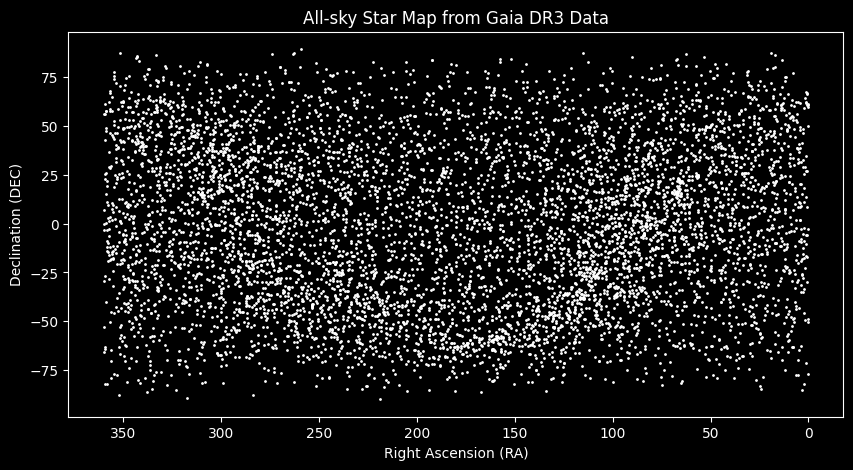

In [2]:
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia

# 使用SQL語句藉由Astroquery從Gaia資料庫中取得亮星的資料
query = "SELECT TOP 10000 ra, dec, phot_g_mean_mag AS gmag FROM gaiadr3.gaia_source WHERE phot_g_mean_mag < 6"
job = Gaia.launch_job(query)
data = job.get_results()

# 繪製全天空星圖
plt.figure(figsize=(10, 5))
plt.style.use('dark_background')
plt.scatter(data['ra'], data['dec'], c='white', s=1)
plt.gca().invert_xaxis()
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (DEC)')
plt.title('All-sky Star Map from Gaia DR3 Data')
plt.show()

## (二) 如何用Python繪製星座圖？

In [3]:
from astroquery.vizier import Vizier

# 查詢VizieR資料庫中符合"Yale Bright Star Catalog"關鍵字的資料表
catalog_list = Vizier.find_catalogs('Yale Bright Star Catalog')
for key, value in catalog_list.items():
    print(f"Catalog ID: {key}, Description: {value.description}")

Catalog ID: V/61, Description: Almagest (Ptolemy's Star Catalog)
Catalog ID: I/212, Description: Proper motions in NGC 3680 (Kozhurina-Platais+, 1995)
Catalog ID: V/50, Description: Bright Star Catalogue, 5th Revised Ed. (Hoffleit+, 1991)


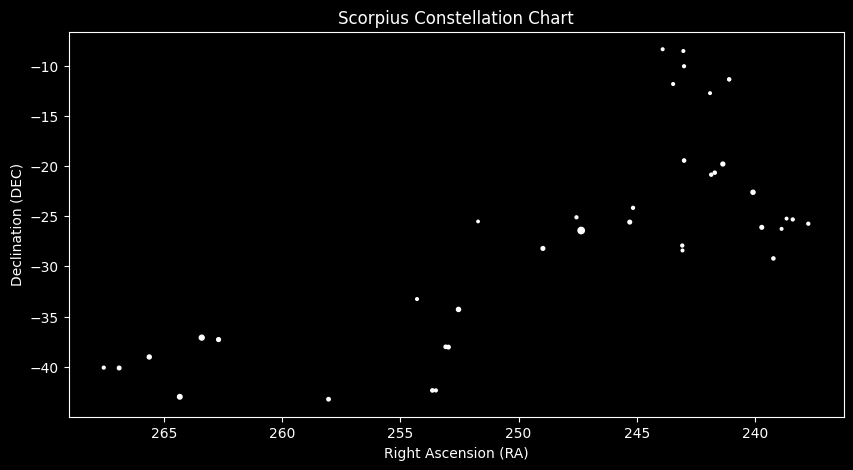

In [4]:
from astroquery.vizier import Vizier
import matplotlib.pyplot as plt

# 初始化Vizier查詢物件，指定我們感興趣的資料表目錄和欄位
v = Vizier(catalog="V/50", columns=["_RAJ2000", "_DEJ2000", "Vmag", "Name"], row_limit=-1)

# 執行查詢，並使用天蠍座縮寫'Sco'來過濾'Name'欄位中的資料，以篩選出天蠍座的亮星資料
result = v.query_constraints()
bright_stars = result[0].to_pandas()
scorpio_stars = bright_stars[bright_stars['Name'].str.contains('Sco')]

# 繪製天蠍座星座圖，並根據星等大小設定資料點的大小，星體越亮，資料點越大
plt.figure(figsize=(10, 5))
plt.style.use('dark_background')
plt.scatter(scorpio_stars['_RAJ2000'], scorpio_stars['_DEJ2000'], c='white', s=20/scorpio_stars['Vmag'])
plt.gca().invert_xaxis()
plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (DEC)')
plt.title('Scorpius Constellation Chart')
plt.show()